### Pandas (interacción con archivos csv, txt, tsv)

El módulo pandas es una herramienta que permite trabajar con datos estructurados en archivos de texto.
Dentro de los formatos de archivos de texto más usuales tenemos las extensiones `csv`,`tsv` y `txt`,  en donde se tienen valores separados por coma, valores separados por tabulaciones y valores sin una separación específica respectivamente. De todas maneras la extensión del archivo no resulta conclucyente para comprender como están estructurados los datos, por lo que siempre se aconseja "mirar" el archivo antes de usarlo.

A la hora de recojer y producir datos, debemos informar a la herramienta que utilicemos cómo están estructurados los mismos, ya sea que estén separados por espacios, tabulaciones, comas, punto y coma o cualquier otro delimitador válido según el formato. Los errores más comunes cuando no se obtienen los resultados esperados suelen surgir por una mala interpretación de cómo están organizados los datos al momento de leerlos o escribirlos para su uso.

Para poder usar la librería `pandas` debemos importarla como hacemos con cualquier otra

``` python
import pandas as pd
```
Veamos lo básico de pandas antes de leer datos desde un archivo.

Los datos en pandas se estructuran a partir de dos elementos básicos: *series* y *dataframes* que podemos pensar como vectores columna y matrices (o tablas) respetivamene.

Veamos algunos ejemplos

In [ ]:
import pandas as pd
import numpy as np

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Como vemos, el vector esta indexado al estilo python iniciándose en cero para el primer elemento.

Un dataframe se puede crear a partir de varias series puestas una a continuación de otra, o desde datos que ya estén tabulados. En ese caso, cada columna será entonces una serie.

Las columnas pueden nombrarse o leerse desde un archivo en caso de que estemos leyendo los datos.

También es posible reemplazar el índice por por otros datos tales como fechas, horas, etc. incluso es posible eliminar el índice del dataframe.



In [ ]:
df = pd.DataFrame(np.random.rand(6,4),columns=list("ABCD"))
df

,A,B,C,D
0,0.939572,0.020516,0.316436,0.950839
1,0.854842,0.920414,0.522787,0.442223
2,0.549076,0.931013,0.455005,0.761476
3,0.537629,0.419205,0.610875,0.519158
4,0.943395,0.288553,0.756474,0.548668
5,0.130206,0.273528,0.043156,0.426248


Podemos acceder a las series por separados referenciando al dataframe con una sintaxis similar a la listas.

In [ ]:
A = df["A"]
print(A)
print(A[0])
print(df["A"][1])

0    0.939572
1    0.854842
2    0.549076
3    0.537629
4    0.943395
5    0.130206
Name: A, dtype: float64
0.9395717793890014
0.8548420412912521


Las series se pueden convertir en arrays de numpy haciendo lo siguiente:

In [ ]:
ca = df['A'].to_numpy()

type(ca)

numpy.ndarray

#### Leer archivos desde pandas

Para leer archivos nos vamos a restringir al formato `csv` que aunque su nombre indique que los valores están separados por comas, en verdad, admite todo un zoológico de posibles caracteres para separar los datos.

para hacerlo usamos la función `read_csv` cuya [ayuda](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table) se pude consultar tanto usando la ayuda en línea de colab como la propia de pandas.

In [ ]:
pd.read_csv? # si ejecutamos esta línea nos muestra la ayda de esta función

Antes de poder usar un archivo debemos poder importarlo:

*  Subiéndolo manualmente a la sesión de colab
*  Montando la unidad de drive y leyéndolo desde nuestra unidad de google drive.

En el primer caso debemos ir a `archivos` (la carpetita en la barra izquierda) y luego seleccionar subir al almacenamiento de la sesión

En el segundo caso, debemos ir a `archivos` (la carpetita en la barra izquierda) y tocar en la carpetita con el logotipo de drive (montar drive)

Voy a seguir la segunda opción ya que la considero más flexible.
Debemos seguir los pasos de los cuadros de diálogo que aparecen y luego podremos acceder a nuestros archivos una vez que veamos el texto: `mounted at` seguido de la ruta en la cual estará nuestro disco que por defecto se llama `MyDrive`

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Guías de ejercicios/fallingtennisball02.d',names=['t','y'],delim_whitespace=True)

In [ ]:
datos.head() # los pimeros datos del archivo

,t,y
0,0.000,1.600000
1,0.001,1.599995
2,0.002,1.599980
3,0.003,1.599956
4,0.004,1.599921


In [ ]:
datos.tail() # los últimos

,t,y
2495,2.495,0.048161
2496,2.496,0.046128
2497,2.497,0.044086
2498,2.498,0.042033
2499,2.499,0.039971


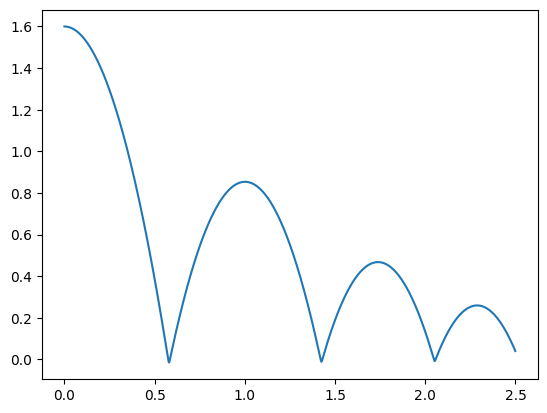

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = plt.plot(datos['t'],datos['y'])

In [ ]:
datos0 = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo.csv')
# leo este archivo tal como está no obtengo algo coherente
datos2 = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo.csv',";")
# si le digo que el separador es punto y coma lo lee como corresponde y asigna los combres de las columnas
# automáticamente junto con los índices
datos2

<ipython-input-5-e03965d35cf0>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  datos2 = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo.csv',";")


,col1,col2,col3
0,"0,63","0,38","0,7"
1,"0,55","0,64","0,68"
2,"0,87","0,77","0,4"
3,"0,29","0,24","0,48"
4,"0,4","0,59","0,92"
5,"0,4","0,11","0,11"
6,"0,11","0,46","0,11"
7,"0,22","0,8","0,74"


In [ ]:
datos2

,col1,col2,col3
0,"0,63","0,38","0,7"
1,"0,55","0,64","0,68"
2,"0,87","0,77","0,4"
3,"0,29","0,24","0,48"
4,"0,4","0,59","0,92"
5,"0,4","0,11","0,11"
6,"0,11","0,46","0,11"
7,"0,22","0,8","0,74"


El dataframe se creó, pero es probable que aunque se vean "bien" los datos numéricos no tengan formato de número siendo que por defecto, pandas espera que el separador decimal sea un punto y no una coma, comprobémoslo

In [ ]:
type(datos2['col1'][0])

str

Para evitar esto, debemos usar el parametro `decimal`

In [ ]:
datos2 = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo.csv',decimal=",",sep=";")

In [ ]:
pd.read_csv()

In [ ]:
type(datos2['col1'][0])

numpy.float64

#### Guardar archivos desde pandas

Así como leimos usando `read_csv` vamos a escribir usando `to_csv`. Pueden consultar la [ayuda en linea](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
df2 = pd.DataFrame(np.random.rand(6,4),columns=list("ABCD")) # creamos unos datos

df2


,A,B,C,D
0,0.775030,0.988084,0.367277,0.276403
1,0.771687,0.038954,0.919758,0.313229
2,0.152389,0.196890,0.962008,0.135760
3,0.480900,0.197571,0.535731,0.200981
4,0.028456,0.522056,0.664155,0.386979
5,0.288341,0.175502,0.465928,0.341162


In [ ]:
df2.to_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo2.csv',index=False,encoding='utf-8')
# index = False elimina la columna de los índices
# encoding = 'utf-8' es la codificación estándar
# https://es.wikipedia.org/wiki/UTF-8


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo2.csv')

df3

,A,B,C,D
0,0.775030,0.988084,0.367277,0.276403
1,0.771687,0.038954,0.919758,0.313229
2,0.152389,0.196890,0.962008,0.135760
3,0.480900,0.197571,0.535731,0.200981
4,0.028456,0.522056,0.664155,0.386979
5,0.288341,0.175502,0.465928,0.341162


También podemos exportar a formato excel usando la función `to_excel`. Para más información consultar la [ayuda en línea](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel)

In [ ]:
df2.to_excel('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ejemplo2.xlsx')